# Guided Project: Winning Jeopardy

Solution notebook can be referenced [here](https://github.com/dataquestio/solutions/blob/master/Mission210Solution.ipynb).

## Jeopardy Questions

Jeopardy is a popular TV show in the US where participants answer questions to win money. It's been running for many years, and is a major force in popular culture.

Imagine that you want to compete on Jeopardy, and you're looking for any way to win. In this project, you'll work with a dataset of Jeopardy questions to figure out some patterns in the questions that could help you win.

The dataset is named `jeopardy.csv`, and contains `20000` rows from the beginning of a full dataset of Jeopardy questions, which you can download [here](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file).

Here's the beginning of the file:

![](https://dq-content.s3.amazonaws.com/Nlfu13A.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re

In [2]:
jeopardy = pd.read_csv('jeopardy.csv', parse_dates=[' Air Date'])
jeopardy.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [3]:
jeopardy.columns = jeopardy.columns.str.strip()
jeopardy.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [4]:
jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 7 columns):
Show Number    19999 non-null int64
Air Date       19999 non-null datetime64[ns]
Round          19999 non-null object
Category       19999 non-null object
Value          19999 non-null object
Question       19999 non-null object
Answer         19999 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.1+ MB


In [5]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


## Normalizing Text

In [6]:
## text cleaning
## 1. to lowercase
## 2. remove all punctuation

def normalize_text(text:str):
    
    text = text.lower()
    text = re.sub(r'[{}]'.format(string.punctuation), '', text)

    return text

In [7]:
jeopardy['clean_question'] = jeopardy['Question'].apply(normalize_text)
jeopardy[['Question', 'clean_question']].head()

,Question,clean_question
0,"For the last 8 years of his life, Galileo was ...",for the last 8 years of his life galileo was u...
1,No. 2: 1912 Olympian; football star at Carlisl...,no 2 1912 olympian football star at carlisle i...
2,The city of Yuma in this state has a record av...,the city of yuma in this state has a record av...
3,"In 1963, live on ""The Art Linkletter Show"", th...",in 1963 live on the art linkletter show this c...
4,"Signer of the Dec. of Indep., framer of the Co...",signer of the dec of indep framer of the const...


In [8]:
jeopardy['clean_answer'] = jeopardy['Answer'].apply(normalize_text)
jeopardy[['Answer', 'clean_answer']].head()

,Answer,clean_answer
0,Copernicus,copernicus
1,Jim Thorpe,jim thorpe
2,Arizona,arizona
3,McDonald's,mcdonalds
4,John Adams,john adams


## Normalizing Columns

In [9]:
# Values come with None
jeopardy['Value'].value_counts()

$400       3892
$800       2980
$200       2784
$600       1890
$1000      1796
$2000      1074
$1200      1069
$1600      1027
$100        804
$500        798
$300        764
None        336
$1,000      184
$2,000      149
$3,000       70
$1,500       50
$1,200       42
$4,000       32
$5,000       23
$1,800       22
$1,400       20
$1,600       19
$2,500       18
$700         15
$2,200       11
$2,400        8
$3,600        8
$7,000        7
$6,000        7
$3,200        6
           ... 
$7,200        2
$3,800        2
$2,100        2
$6,200        1
$8,200        1
$1,111        1
$750          1
$1,492        1
$2,900        1
$2,300        1
$3,389        1
$3,300        1
$1,700        1
$4,100        1
$367          1
$4,700        1
$7,400        1
$9,000        1
$7,500        1
$5,800        1
$2,021        1
$4,500        1
$5,200        1
$6,800        1
$2,127        1
$3,900        1
$5,400        1
$1,020        1
$10,800       1
$6,100        1
Name: Value, Length: 76,

In [10]:
def normalize_value(value:str):
    
    value = re.sub(r'[$,]', '', value)
    
    try:
        value = int(value)
    except:
        value = 0
    
    return value

In [11]:
jeopardy['clean_value'] = jeopardy['Value'].apply(normalize_value)
jeopardy['clean_value'].value_counts()

400      3892
800      2980
200      2784
1000     1980
600      1890
2000     1223
1200     1111
1600     1046
100       804
500       798
300       764
0         336
3000       70
1500       50
4000       32
5000       23
1800       22
1400       20
2500       18
700        15
2200       11
3600        8
2400        8
7000        7
6000        7
900         6
1300        6
3500        6
3200        6
1100        6
         ... 
4400        2
4800        2
3800        2
5200        1
1492        1
6800        1
7500        1
1700        1
7400        1
750         1
4700        1
2127        1
3900        1
2300        1
3389        1
1020        1
9000        1
8200        1
6200        1
10800       1
5800        1
5400        1
1111        1
367         1
4500        1
4100        1
2021        1
3300        1
2900        1
6100        1
Name: clean_value, Length: 72, dtype: int64

In [12]:
jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 10 columns):
Show Number       19999 non-null int64
Air Date          19999 non-null datetime64[ns]
Round             19999 non-null object
Category          19999 non-null object
Value             19999 non-null object
Question          19999 non-null object
Answer            19999 non-null object
clean_question    19999 non-null object
clean_answer      19999 non-null object
clean_value       19999 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.5+ MB


## Answers in Questions

In order to figure out whether to study past questions, study general knowledge, or not study it all, it would be helpful to figure out two things:

* How often the answer can be used for a question.
* How often questions are repeated.

In [13]:
def count_answer_in_question(row):
    
    split_answer = row['clean_answer'].split()
    split_question = row['clean_question'].split()
    
    match_count = 0
    
    try:
        split_answer.remove('the')
    except:
        pass 
    
    if len(split_answer) == 0:
        return 0
    
    else:
        
        for answer in split_answer:
            if answer in split_question:
                match_count += 1
                
        return match_count/len(split_answer)

In [14]:
jeopardy['answer_in_question'] = jeopardy.apply(count_answer_in_question, axis = 1)
jeopardy['answer_in_question'].head(20)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.5
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: answer_in_question, dtype: float64

In [15]:
jeopardy['answer_in_question'].mean()

0.058861482035140716

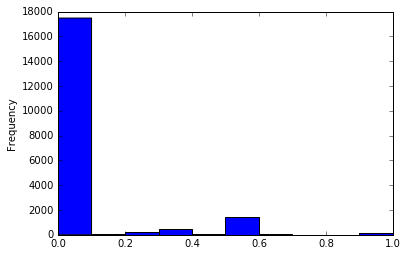

In [16]:
%matplotlib inline

jeopardy['answer_in_question'].plot.hist()

On average, we can only get about 6 % answer words from the questions, so it is unlikely that the questions themselves will be helpful to find their answers. 

## Recycled Questions

In [17]:
jeopardy.sort_values('Air Date', inplace=True)
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question
19325,10,1984-09-21,Final Jeopardy!,U.S. PRESIDENTS,None,"Adventurous 26th president, he was 1st to ride...",Theodore Roosevelt,adventurous 26th president he was 1st to ride ...,theodore roosevelt,0,0.0
19301,10,1984-09-21,Double Jeopardy!,LABOR UNIONS,$200,Notorious labor leader missing since '75,Jimmy Hoffa,notorious labor leader missing since 75,jimmy hoffa,200,0.0
19302,10,1984-09-21,Double Jeopardy!,1789,$200,"Washington proclaimed Nov. 26, 1789 this first...",Thanksgiving,washington proclaimed nov 26 1789 this first n...,thanksgiving,200,0.0
19303,10,1984-09-21,Double Jeopardy!,TOURIST TRAPS,$200,Both Ferde Grofe' & the Colorado River dug thi...,the Grand Canyon,both ferde grofe the colorado river dug this ...,the grand canyon,200,0.0
19304,10,1984-09-21,Double Jeopardy!,LITERATURE,$200,"Depending on the book, he could be a ""Jones"", ...",Tom,depending on the book he could be a jones a sa...,tom,200,0.0


In [18]:
question_overlap = []
terms_used = set()

for index, row in jeopardy.iterrows():
    
    split_question = row['clean_question'].split()
    
    # wrong solution - remove during the loop change the iterator instantly
    # for w in split_question:
        #if len(w) < 6:
            #split_question.remove(w)
            
    split_question = [w for w in split_question if len(w) > 5]
    
    match_count = 0
    
    for w in split_question:
        if w in terms_used:
            match_count +=1
            
    for w in split_question: 
        terms_used.add(w)
        
    if len(split_question) > 0:
        match_count =  match_count/len(split_question)
        
    question_overlap.append(match_count)

In [19]:
jeopardy['question_overlap'] = question_overlap
jeopardy['question_overlap'].mean()

0.687124288096678

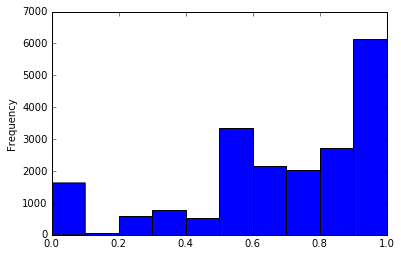

In [20]:
%matplotlib inline

jeopardy['question_overlap'].plot.hist()

While there appears to be an average chance of around 70 % to encounter questions with repeated terms, it is not guaranteed that the questions are directly relevant to previous ones. However, looking into high-frequency terms can be potentially beneficial. 

## Low Value vs High Value Questions

In [21]:
import random 
from scipy.stats import chi2_contingency

In [22]:
random.seed(1)
sampled_terms = random.sample(terms_used, 10)
sampled_terms

['gypsophila',
 'shades',
 'populated',
 'starkiller',
 'cubeshaped',
 'securely',
 'singers',
 'alsatian',
 'crunchy',
 'kittens']

In [23]:
jeopardy['high_value'] = jeopardy['clean_value'].apply(lambda x: 1 if x > 800 else 0)
jeopardy['high_value'].sample(10, random_state = 1)

7637     1
603      0
12390    0
15933    0
5982     0
12947    1
16848    0
10454    1
17682    0
9180     0
Name: high_value, dtype: int64

In [24]:
term = sampled_terms[8]
jeopardy['appear_in_question'] = jeopardy['clean_question'].apply(lambda x: 1 if term in x.split() else 0)
jeopardy['appear_in_question'].sample(10, random_state = 1)

7637     0
603      0
12390    0
15933    0
5982     0
12947    0
16848    0
10454    0
17682    0
9180     0
Name: appear_in_question, dtype: int64

In [25]:
term_crosstab = pd.crosstab(jeopardy['high_value'], jeopardy['appear_in_question'])
term_crosstab

appear_in_question,0,1
high_value,,
0,14264,1
1,5734,0


In [26]:
chisq, pvalue, dof, expected_fq = chi2_contingency(term_crosstab)

print(
'''For term "{}",
Chi-square statistic: {:.5f};
P-value: {:.5f};
Degree of freedom: {};
Expected frequencies: {}.
'''.format(term, chisq, pvalue, dof, expected_fq)
)

For term "crunchy",
Chi-square statistic: 0.22245;
P-value: 0.63718;
Degree of freedom: 1;
Expected frequencies: [[1.42642867e+04 7.13285664e-01]
 [5.73371329e+03 2.86714336e-01]].



In [27]:
# This is can be done in batch of sample terms

for term in sampled_terms:
    
    # Need to update the term frequency in questions
    jeopardy['appear_in_question'] = jeopardy['clean_question'].apply(lambda x: 1 if term in x.split() else 0)
    term_crosstab = pd.crosstab(jeopardy['high_value'], jeopardy['appear_in_question'])
    chisq, pvalue, dof, expected_fq = chi2_contingency(term_crosstab)
    
    print(
    '''For term "{}",
    Chi-square statistic: {:.5f};
    P-value: {:.5f};
    Degree of freedom: {};
    Expected frequencies: {}.
    '''.format(term, chisq, pvalue, dof, expected_fq)
    )

For term "gypsophila",
    Chi-square statistic: 0.22245;
    P-value: 0.63718;
    Degree of freedom: 1;
    Expected frequencies: [[1.42642867e+04 7.13285664e-01]
 [5.73371329e+03 2.86714336e-01]].
    
For term "shades",
    Chi-square statistic: 0.21144;
    P-value: 0.64564;
    Degree of freedom: 1;
    Expected frequencies: [[1.42628601e+04 2.13985699e+00]
 [5.73313986e+03 8.60143007e-01]].
    
For term "populated",
    Chi-square statistic: 0.66742;
    P-value: 0.41395;
    Degree of freedom: 1;
    Expected frequencies: [[1.42628601e+04 2.13985699e+00]
 [5.73313986e+03 8.60143007e-01]].
    
For term "starkiller",
    Chi-square statistic: 0.22245;
    P-value: 0.63718;
    Degree of freedom: 1;
    Expected frequencies: [[1.42642867e+04 7.13285664e-01]
 [5.73371329e+03 2.86714336e-01]].
    
For term "cubeshaped",
    Chi-square statistic: 0.22245;
    P-value: 0.63718;
    Degree of freedom: 1;
    Expected frequencies: [[1.42642867e+04 7.13285664e-01]
 [5.73371329e+03 2.8

It can be seen that we generally observe terms with very high p-values, thus they are not very different than what is expected from the distribution between high and low value questions. This is, however, likely resulting from a very low frequency of a specific word in all questions. 

In [28]:
jeopardy.drop(['appear_in_question'], axis = 1, inplace = True)
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question,question_overlap,high_value
19325,10,1984-09-21,Final Jeopardy!,U.S. PRESIDENTS,None,"Adventurous 26th president, he was 1st to ride...",Theodore Roosevelt,adventurous 26th president he was 1st to ride ...,theodore roosevelt,0,0.0,0.0,0
19301,10,1984-09-21,Double Jeopardy!,LABOR UNIONS,$200,Notorious labor leader missing since '75,Jimmy Hoffa,notorious labor leader missing since 75,jimmy hoffa,200,0.0,0.0,0
19302,10,1984-09-21,Double Jeopardy!,1789,$200,"Washington proclaimed Nov. 26, 1789 this first...",Thanksgiving,washington proclaimed nov 26 1789 this first n...,thanksgiving,200,0.0,0.0,0
19303,10,1984-09-21,Double Jeopardy!,TOURIST TRAPS,$200,Both Ferde Grofe' & the Colorado River dug thi...,the Grand Canyon,both ferde grofe the colorado river dug this ...,the grand canyon,200,0.0,0.5,0
19304,10,1984-09-21,Double Jeopardy!,LITERATURE,$200,"Depending on the book, he could be a ""Jones"", ...",Tom,depending on the book he could be a jones a sa...,tom,200,0.0,0.0,0


In [29]:
## count word appearance by question value

def count_word_appearance_by_value(word:str):
    
    high_count = 0
    low_count = 0
    
    for index, row in jeopardy.iterrows():
        
        if word in row['clean_question'].split():
            if row['high_value'] == 1:
                high_count += 1
            else:
                low_count += 1
    
    return high_count, low_count

In [30]:
random.seed(2)
comparison_terms = random.sample(terms_used, 10)
comparison_terms

['nikita',
 'muskmelon',
 'oxidized',
 'klinger',
 'houdini',
 'herman',
 'presbytery',
 'affaitati',
 'banting',
 'swooped']

In [31]:
observed_expected = []

for term in comparison_terms:
    observed_expected.append(count_word_appearance_by_value(term))

observed_expected

[(0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 2),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0)]

## Applying the Chi-squared Test

In [32]:
high_value_count = sum(jeopardy['high_value'] == 1)
low_value_count = sum(jeopardy['high_value'] == 0)

high_value_count, low_value_count

(5734, 14265)

In [33]:
from scipy.stats import chisquare

chi_squared = []

for counts in observed_expected:
    
    high_count, low_count = counts
    total = sum(counts)
    total_prop = total/jeopardy.shape[0]
    
    high_value_expected = high_value_count*total_prop
    low_value_expected = low_value_count*total_prop
    
    chisq, p = chisquare((high_count, low_count), (high_value_expected, low_value_expected))
    
    chi_squared.append((chisq, p))

In [34]:
for term, chisq_test in zip(comparison_terms, chi_squared):
    
    chisq, p = chisq_test
    
    print(
    '''For term "{}",
    Chi-square statistic: {:.5f};
    P-value: {:.5f}.
    '''.format(term, chisq, p)
    )

For term "nikita",
    Chi-square statistic: 0.40196;
    P-value: 0.52608.
    
For term "muskmelon",
    Chi-square statistic: 0.40196;
    P-value: 0.52608.
    
For term "oxidized",
    Chi-square statistic: 2.48779;
    P-value: 0.11473.
    
For term "klinger",
    Chi-square statistic: 0.40196;
    P-value: 0.52608.
    
For term "houdini",
    Chi-square statistic: 0.40196;
    P-value: 0.52608.
    
For term "herman",
    Chi-square statistic: 0.03188;
    P-value: 0.85829.
    
For term "presbytery",
    Chi-square statistic: 0.40196;
    P-value: 0.52608.
    
For term "affaitati",
    Chi-square statistic: 0.40196;
    P-value: 0.52608.
    
For term "banting",
    Chi-square statistic: 2.48779;
    P-value: 0.11473.
    
For term "swooped",
    Chi-square statistic: 2.48779;
    P-value: 0.11473.
    
